In [1]:
%matplotlib inline
from ipywidgets import interactive, fixed
from obpds import *

layers = [
    Layer(1*um, InAs, 1e15/cm3),  # p-type layer
    Layer(1*um, InAs, -2e18/cm3), # n-type layer
    ]

d = TwoTerminalDevice(layers=layers,
                      Fp='left',
                      Fn='right')

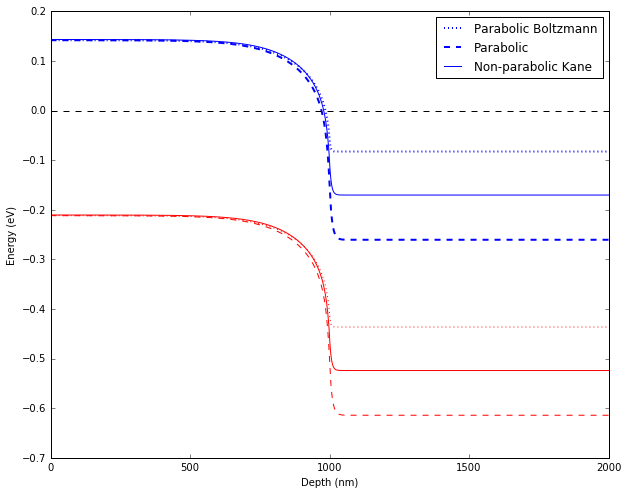

In [2]:
# Simulate and compare the equilibrium band profiles under different approximations
import matplotlib.pyplot as plt
_, ax1 = plt.subplots(figsize=(10,8))
ax1.set_ymargin(0.05)
ax1.set_ylabel('Energy (eV)')
ax1.set_xlabel('Depth (nm)')

solution = d.get_equilibrium(approx='boltzmann')
x = solution.x*1e7 # nm
ax1.plot(x, solution.Ev, 'r:')
ax1.plot(x, solution.Ec, 'b:', lw=2, label='Parabolic Boltzmann')

solution = d.get_equilibrium(approx='parabolic')
x = solution.x*1e7 # nm
ax1.plot(x, solution.Ev, 'r--')
ax1.plot(x, solution.Ec, 'b--', lw=2, label='Parabolic')

solution = d.get_equilibrium(approx='kane')
x = solution.x*1e7 # nm
ax1.plot(x, solution.Ev, 'r-')
ax1.plot(x, solution.Ec, 'b-', label='Non-parabolic Kane')
ax1.plot(x, solution.Ef, 'k--')

ax1.legend(loc='best')
plt.show()